# Which will be the next game?
The goal of this analysis is to make a prediction for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. The analysis is needed to identify patterns that determine whether a game succeeds or not. This will allow  to spot potential big winners and plan advertising campaigns.
The data is data going back to 2016: it’s December 2016 and Ice is planning a campaign for 2017.

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game’s content and assigns an age rating such as Teen or Mature.


After loading the dataframe, we'll spend some time polishing it to ensure it’s ready to use. This data cleaning, consists of amending or removing incorrect or superfluous data, as well as checking for incompleteness or inconsistencies.

Then, I’ll begin to slice the data to extract meaningful insights from it. Using the techniques and methods of data analysis, I’ll look for hidden patterns and relationships, and find insights and predictions. After I’ve interpreted the results and drawn meaningful insights from them, the next step is to create visualizations by selecting the most appropriate charts and graphs.

## Initialization

Load libraries that are required for the project.

In [1]:
import pandas as pd
import scipy.stats as st
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl



### Load data

Load the project data and have a look at the general information

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data= pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Explore initial data

The dataset contains the following fields:
Data description
* —Name
* —Platform
* —Year_of_Release
* —Genre
* —NA_sales (North American sales in USD million)
* —EU_sales (sales in Europe in USD million)
* —JP_sales (sales in Japan in USD million)
* —Other_sales (sales in other countries in USD million)
* —Critic_Score (maximum of 100)
* —User_Score (maximum of 10)
* —Rating (ESRB)

In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


to make the job faster, we should rename the column by using only lowercases:

In [5]:
data.columns = ['name', 'platform', 'year_of_release', 'genre', 
              'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 
              'critic_score', 'user_score', 'rating' ]

In [6]:
data.sample(6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3683,The SpongeBob SquarePants Movie,XB,2004.0,Platform,0.40,0.12,0.00,0.02,74.0,8.5,E
15669,New Atelier Rorona: Hajimari no Monogatari,3DS,2015.0,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
7549,Enchanted Arms,PS3,2007.0,Role-Playing,0.17,0.01,0.00,0.02,64.0,5.9,T
6193,Skylanders: Trap Team,3DS,2014.0,Action,0.16,0.10,0.00,0.02,NaN,3.4,E10+
511,F-Zero,SNES,1990.0,Racing,1.37,0.51,0.89,0.07,NaN,NaN,NaN
13155,OutRun 2006: Coast 2 Coast,PS2,2006.0,Racing,0.02,0.01,0.01,0.00,81.0,8.8,E


In [7]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


To facilitate further steps, we can convert all cases to lowercase:

In [8]:
def lower_consistent(df):
    '''defining a function to convert all strings to lowercase, 
       making it general with the condition of data type=object,  
       to possibly apply it in future manipulation''' 
    
    df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x) 
    return df


In [9]:
data[['name','genre', 'platform', 'rating' ]] = lower_consistent(data[['name','genre', 'platform', 'rating']])

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,16713,11559,need for speed: most wanted,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
platform,16715,31,ps2,2161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_release,16446.0,NaN,NaN,NaN,2006.484616,5.87705,1980.0,2003.0,2007.0,2010.0,2016.0
genre,16713,12,action,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
na_sales,16715.0,NaN,NaN,NaN,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
eu_sales,16715.0,NaN,NaN,NaN,0.14506,0.503339,0.0,0.0,0.02,0.11,28.96
jp_sales,16715.0,NaN,NaN,NaN,0.077617,0.308853,0.0,0.0,0.0,0.04,10.22
other_sales,16715.0,NaN,NaN,NaN,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
critic_score,8137.0,NaN,NaN,NaN,68.967679,13.938165,13.0,60.0,71.0,79.0,98.0
user_score,10014,96,tbd,2424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [12]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Data type casting is necessary when an output returned is a data type different than what we need to perform any further operations. converting years to a whole number:

In [13]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

let'see if there is a pattern in the "to be determined" user score:

In [14]:
data[data.user_score=='tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: Int64

I expected to see tbd only for the newest games, since I don't see any relevant pattern, I will treat tbd as a missing value, therefore I will replace tbd with NaN and change the data type to float:

In [15]:
data = data.replace('tbd', np.nan)

In [16]:
data['user_score'] = data['user_score'].astype('float')

**looking for the missing values and their percentage:**

In [17]:
mis_values = data.isnull().sum().to_frame('missing_values')
mis_values['%'] = round(data.isnull().sum()/len(data),3)
mis_values.sort_values(by='%', ascending=False)

,missing_values,%
user_score,9125,0.546
critic_score,8578,0.513
rating,6766,0.405
year_of_release,269,0.016
name,2,0.000
platform,0,0.000
genre,2,0.000
na_sales,0,0.000
eu_sales,0,0.000
jp_sales,0,0.000


Replacing missing values in genre and name with unknown, since I can't guess this two categorical variables:

In [18]:
data=data.dropna(subset=['name', 'genre'])

'User_score', 'critic_score' and 'rating' present a lot of missing values. I'll have to replace them with mean, median or mode based on the distribution and skewedness. I will first try to do a multiple imputation for a more correct "guess"

checking the distribution:

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


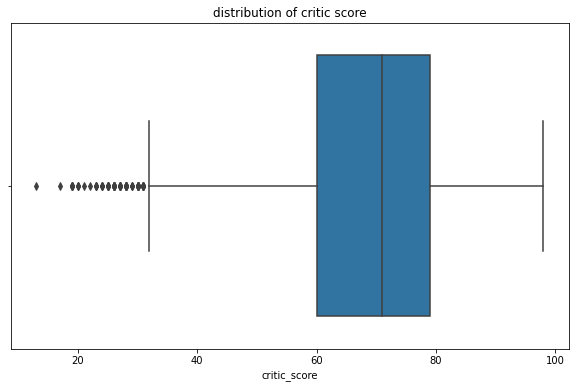

In [19]:
fig, ax = plt.subplots (figsize=(10, 6)) 
sns.boxplot(data.critic_score)
plt.title('distribution of critic score')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


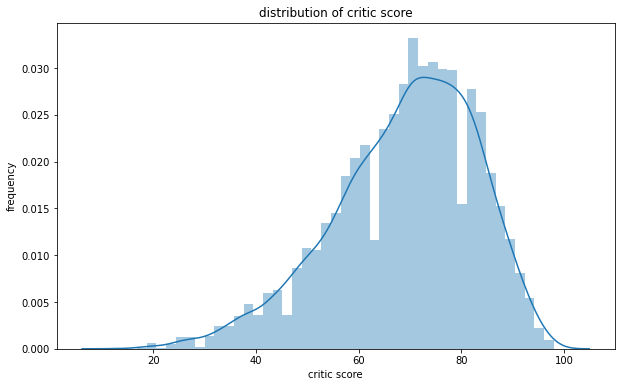

In [20]:
fig, ax = plt.subplots (figsize=(10, 6)) 
sns.distplot(data.critic_score)
plt.title('distribution of critic score')
plt.ylabel('frequency')
plt.xlabel('critic score')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


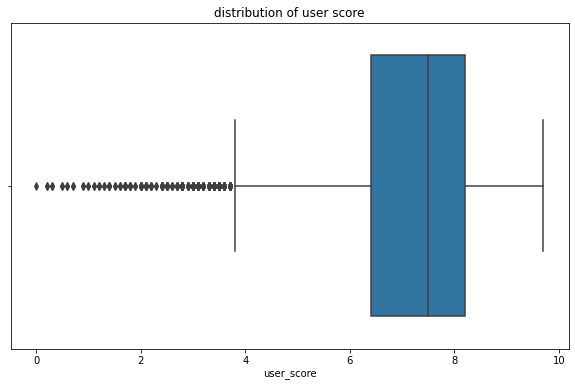

In [21]:
fig, ax = plt.subplots (figsize=(10, 6)) 
sns.boxplot(data.user_score)
plt.title('distribution of user score')
plt.show()

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


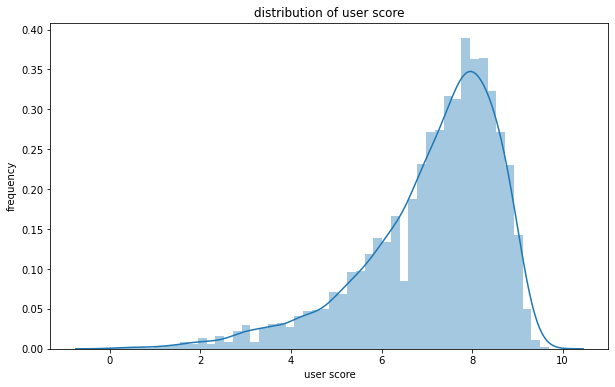

In [22]:
fig, ax = plt.subplots (figsize=(10, 6)) 
sns.distplot(data.user_score)
plt.title('distribution of user score')
plt.ylabel('frequency')
plt.xlabel('user score')

plt.show()

data is clearly skewed to the right, fill missing values with mode or median:

In [23]:
data['rating']=data.groupby(['name'])['rating'].transform(lambda x: x.fillna(x.mode().min()))

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           10386 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [25]:
data.rating.fillna('unknown', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [26]:
data['year_of_release']=data.groupby(['name'])['year_of_release'].transform(lambda x: x.fillna(x.mode().min()))

In [27]:
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [28]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [29]:

data['user_score'] = data['user_score'].fillna(200.0)
data['critic_score'] = data['critic_score'].fillna(200.0)

In [30]:
data.user_score.unique()

array([  8. , 200. ,   8.3,   8.5,   6.6,   8.4,   8.6,   7.7,   6.3,
         7.4,   8.2,   9. ,   7.9,   8.1,   8.7,   7.1,   3.4,   5.3,
         4.8,   3.2,   8.9,   6.4,   7.8,   7.5,   2.6,   7.2,   9.2,
         7. ,   7.3,   4.3,   7.6,   5.7,   5. ,   9.1,   6.5,   8.8,
         6.9,   9.4,   6.8,   6.1,   6.7,   5.4,   4. ,   4.9,   4.5,
         9.3,   6.2,   4.2,   6. ,   3.7,   4.1,   5.8,   5.6,   5.5,
         4.4,   4.6,   5.9,   3.9,   3.1,   2.9,   5.2,   3.3,   4.7,
         5.1,   3.5,   2.5,   1.9,   3. ,   2.7,   2.2,   2. ,   9.5,
         2.1,   3.6,   2.8,   1.8,   3.8,   0. ,   1.6,   9.6,   2.4,
         1.7,   1.1,   0.3,   1.5,   0.7,   1.2,   2.3,   0.5,   1.3,
         0.2,   0.6,   1.4,   0.9,   1. ,   9.7])

In [31]:
data.critic_score.unique()

array([ 76., 200.,  82.,  80.,  89.,  58.,  87.,  91.,  61.,  97.,  95.,
        77.,  88.,  83.,  94.,  93.,  85.,  86.,  98.,  96.,  90.,  84.,
        73.,  74.,  78.,  92.,  71.,  72.,  68.,  62.,  49.,  67.,  81.,
        66.,  56.,  79.,  70.,  59.,  64.,  75.,  60.,  63.,  69.,  50.,
        25.,  42.,  44.,  55.,  48.,  57.,  29.,  47.,  65.,  54.,  20.,
        53.,  37.,  38.,  33.,  52.,  30.,  32.,  43.,  45.,  51.,  40.,
        46.,  39.,  34.,  35.,  41.,  36.,  28.,  31.,  27.,  26.,  19.,
        23.,  24.,  21.,  17.,  22.,  13.])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Since there's no correct way to fill in missing values for the scores, and i can't just drop them because it would result in a big loss of data, I replaced them with the obvious incorrect value 1000.0. later on I will filter them by score<1000.0

In [33]:
data.year_of_release.isnull().value_counts()

False    16567
True       146
Name: year_of_release, dtype: int64

In [34]:
data=data.dropna(subset=['year_of_release'])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


now we don't have missing values

In [36]:
data.duplicated().value_counts()


False    16567
dtype: int64

no duplicated rows were found

### Total sales for column 

In [37]:
data['total_sales']=data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
data.head(6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,200.0,200.0,unknown,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,200.0,200.0,unknown,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,200.0,200.0,unknown,30.26


In [38]:
games_released_per_year=data[['year_of_release','name']].groupby(['year_of_release']).count().reset_index()
print(games_released_per_year)

    year_of_release  name
0              1980     9
1              1981    46
2              1982    36
3              1983    17
4              1984    14
5              1985    14
6              1986    21
7              1987    16
8              1988    15
9              1989    17
10             1990    16
11             1991    41
12             1992    43
13             1993    60
14             1994   122
15             1995   219
16             1996   263
17             1997   289
18             1998   379
19             1999   339
20             2000   351
21             2001   486
22             2002   845
23             2003   783
24             2004   764
25             2005   948
26             2006  1019
27             2007  1202
28             2008  1441
29             2009  1430
30             2010  1270
31             2011  1153
32             2012   662
33             2013   548
34             2014   581
35             2015   606
36             2016   502


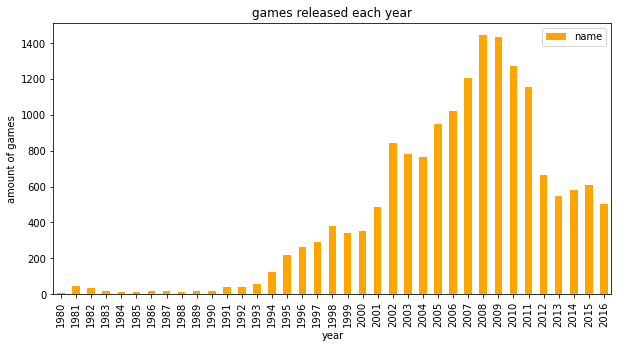

In [39]:
games_released_per_year.plot(kind='bar', x='year_of_release', y='name', figsize=(10,5), color='orange', legend=True)

plt.title('games released each year')
plt.xlabel('year')
plt.ylabel('amount of games')
plt.show()


We don't have a significant number of games released before 2000. In particular in this analysis we should focus on the tendencies about the most recent years. It's important to analyze the lifespan of a platform and games in order to make a prediction

#### Look at how sales varied from platform to platform.
#### Choose the platforms with the greatest total sales and build a distribution based on data for each year. 


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [41]:
na_sales_grouped=data[['platform','na_sales']].groupby(['platform']).sum().sort_values(by='na_sales').reset_index()
display(na_sales_grouped)

,platform,na_sales
0,3do,0.00
1,ws,0.00
2,tg16,0.00
3,gg,0.00
4,ng,0.00
5,pcfx,0.00
6,sat,0.72
7,scd,1.00
8,dc,5.43
9,psv,12.47


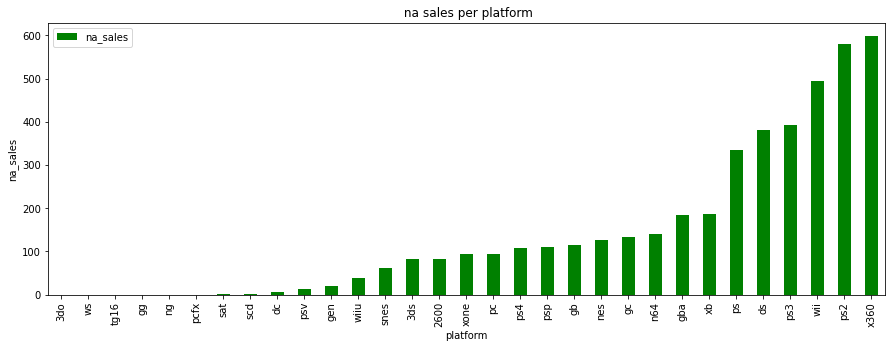

In [42]:
na_sales_grouped.plot(kind='bar', x='platform', y='na_sales', figsize=(15,5), color='green', legend=True)

plt.title( ' na sales per platform')
plt.xlabel('platform')
plt.ylabel('na_sales')
plt.show()

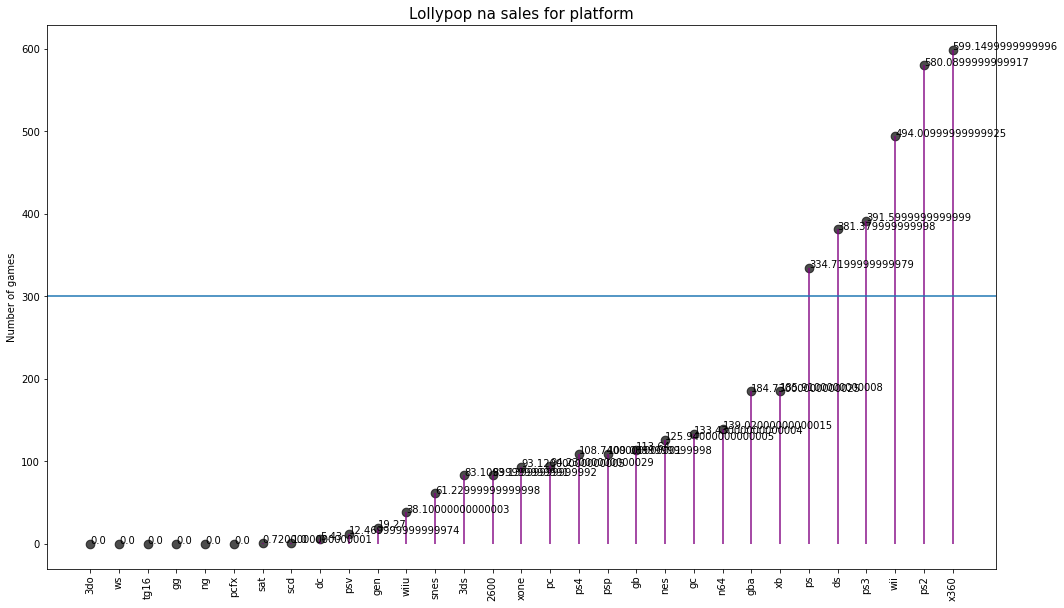

In [43]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=na_sales_grouped.platform, ymin=0, ymax=na_sales_grouped.na_sales, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=na_sales_grouped.platform,y=na_sales_grouped.na_sales, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop na sales for platform", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(na_sales_grouped.platform)
ax.set_xticklabels(na_sales_grouped.platform,rotation=90)
ax.axhline(y=300)

for row in na_sales_grouped.itertuples():
    ax.text(row.platform, row.na_sales,s=row.na_sales)

In [44]:
eu_sales_grouped=data[['platform','eu_sales']].groupby(['platform']).sum().sort_values(by='eu_sales').reset_index()
display(eu_sales_grouped)

,platform,eu_sales
0,3do,0.00
1,ws,0.00
2,pcfx,0.00
3,tg16,0.00
4,ng,0.00
5,gg,0.00
6,scd,0.36
7,sat,0.54
8,dc,1.69
9,2600,5.00


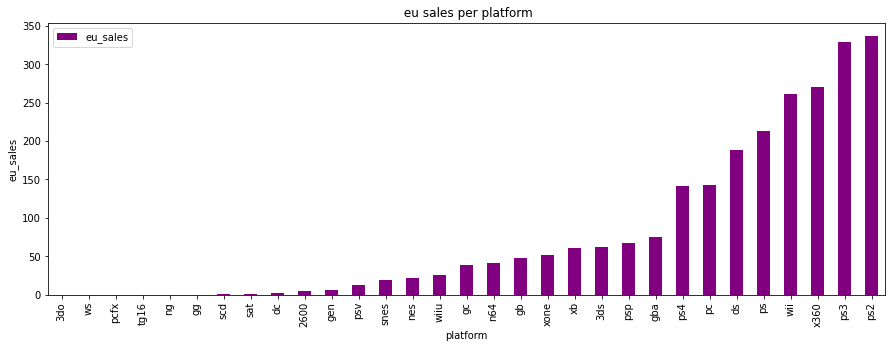

In [45]:
eu_sales_grouped.plot(kind='bar', x='platform', y='eu_sales', figsize=(15,5), color='purple', legend=True)

plt.title( ' eu sales per platform')
plt.xlabel('platform')
plt.ylabel('eu_sales')
plt.show()

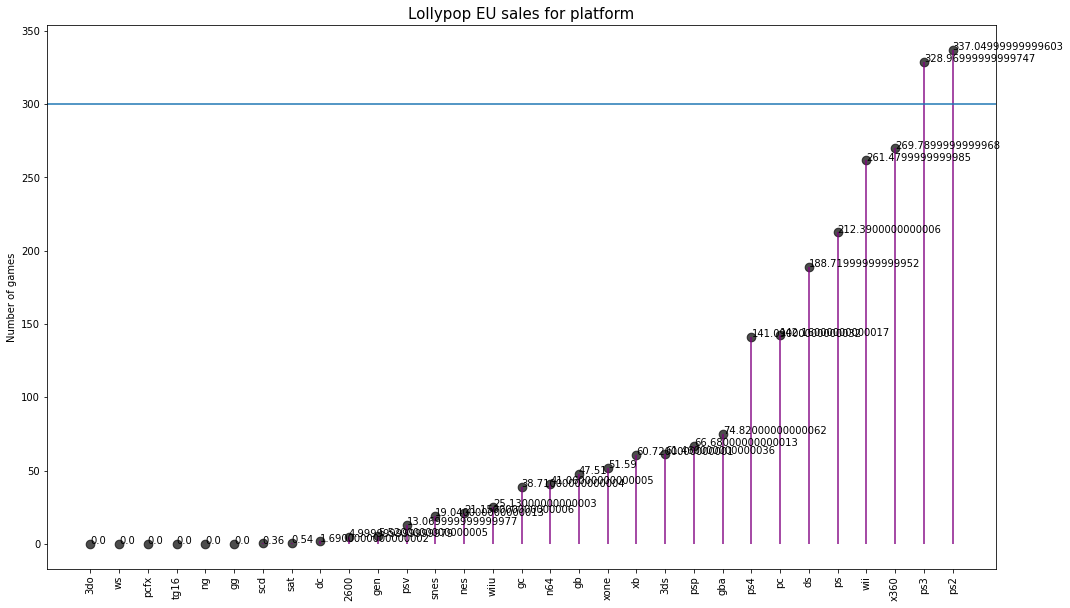

In [46]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=eu_sales_grouped.platform, ymin=0, ymax=eu_sales_grouped.eu_sales, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=eu_sales_grouped.platform,y=eu_sales_grouped.eu_sales, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop EU sales for platform", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(eu_sales_grouped.platform)
ax.set_xticklabels(eu_sales_grouped.platform,rotation=90)
ax.axhline(y=300)

for row in eu_sales_grouped.itertuples():
    ax.text(row.platform, row.eu_sales,s=row.eu_sales)

In [47]:
jp_sales_grouped=data[['platform','jp_sales']].groupby(['platform']).sum().sort_values(by='jp_sales').reset_index()
display(jp_sales_grouped)

,platform,jp_sales
0,2600,0.00
1,pcfx,0.03
2,gg,0.04
3,3do,0.10
4,tg16,0.16
5,pc,0.17
6,xone,0.34
7,scd,0.45
8,xb,1.38
9,ws,1.42


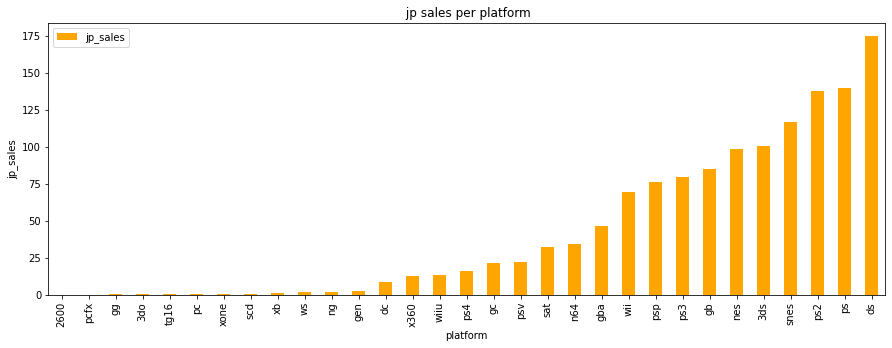

In [48]:
jp_sales_grouped.plot(kind='bar', x='platform', y='jp_sales', figsize=(15,5), color='orange', legend=True)

plt.title( ' jp sales per platform')
plt.xlabel('platform')
plt.ylabel('jp_sales')
plt.show()

NameError: name 'jp_sales_grouped' is not defined

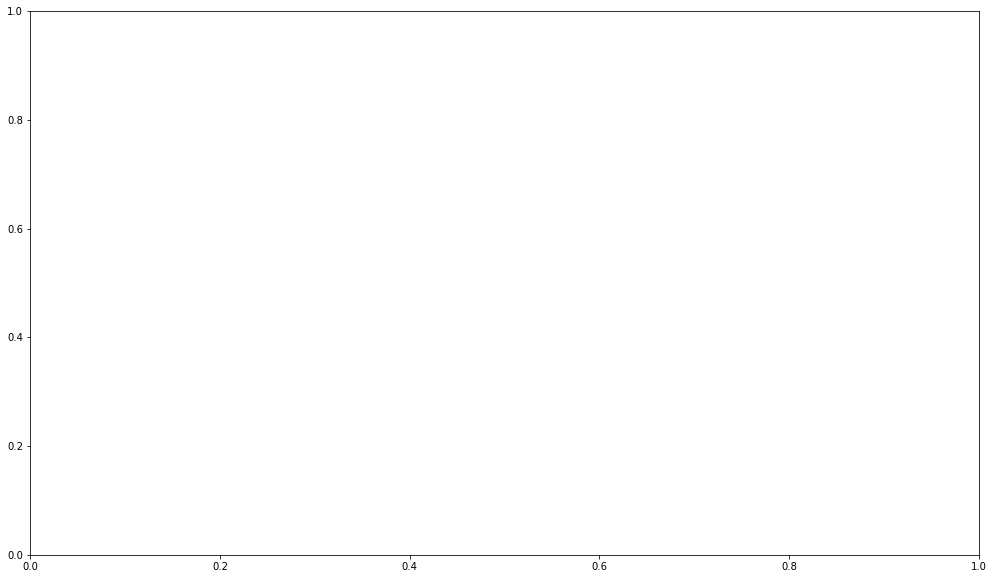

In [4]:
fig,ax=plt.subplots(figsize=(17,10))
ax.vlines(x=jp_sales_grouped.platform, ymin=0, ymax=jp_sales_grouped.jp_sales, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=jp_sales_grouped.platform,y=jp_sales_grouped.jp_sales, s=75, color='black',alpha=0.7)

ax.set_title("Lollypop JP sales for platform", fontdict={'size':15})
ax.set_ylabel('Number of games')
ax.set_xticks(jp_sales_grouped.platform)
ax.set_xticklabels(jp_sales_grouped.platform,rotation=90)
ax.axhline(y=300)

for row in jp_sales_grouped.itertuples():
    ax.text(row.platform, row.jp_sales,s=row.jp_sales)

north america and europe have a similar distribution of sales, while Japan shows different preferences of platforms

In [50]:
df4=data[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales', ascending=False).reset_index()
display(df4)

,platform,total_sales
0,ps2,1247.16
1,x360,966.61
2,ps3,935.19
3,wii,903.31
4,ds,804.28
5,ps,727.58
6,ps4,314.14
7,gba,313.73
8,psp,293.57
9,pc,258.86


In [51]:
data_top=data.query('platform==("x360","ps2","wii","ps3","ds")')

In [52]:
data_top.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91


As previously assessed, we want to focus on data about more recent yers:

In [53]:
data_top=data.query('platform==("x360","ps2","wii","ps3","ds") and year_of_release > 2005')
data_top.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6646 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6646 non-null   object 
 1   platform         6646 non-null   object 
 2   year_of_release  6646 non-null   Int64  
 3   genre            6646 non-null   object 
 4   na_sales         6646 non-null   float64
 5   eu_sales         6646 non-null   float64
 6   jp_sales         6646 non-null   float64
 7   other_sales      6646 non-null   float64
 8   critic_score     6646 non-null   float64
 9   user_score       6646 non-null   float64
 10  rating           6646 non-null   object 
 11  total_sales      6646 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 681.5+ KB


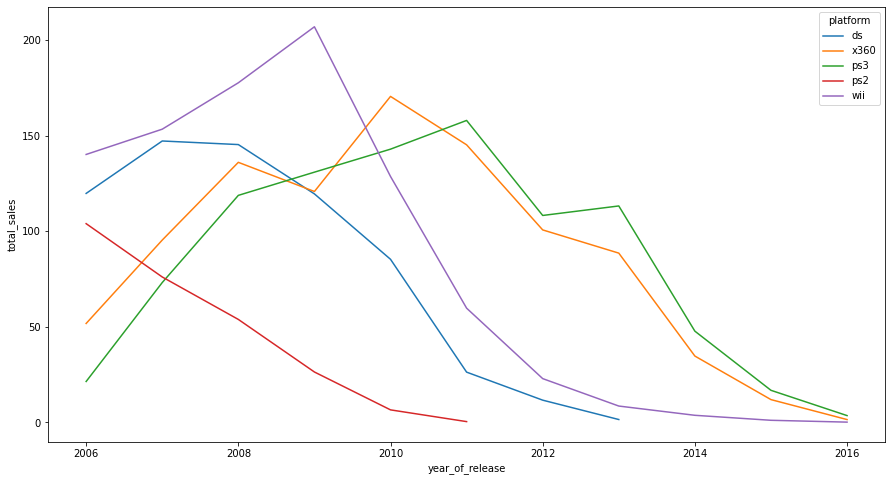

In [54]:
data_top_grouped=data_top.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data=data_top_grouped, x="year_of_release", y="total_sales",hue="platform")

From this graph, we can see that a platform have a life span of popularity of about five years: it takes approximately 5 years to register the most of sales, and a year or two to take off and a year or two to slowly die

To build a prognosis for 2017, I need to observe a period of time of previous 5 years: from 2012

I want to compare data from 2000 and from 2012:

In [55]:
data_new=data[data.year_of_release>=2000]
display(data_new)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,e,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,e,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,200.0,200.0,unknown,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,200.0,200.0,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,200.0,200.0,unknown,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,200.0,200.0,unknown,0.01


In [56]:
data_pivot=pd.pivot_table(data_new,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
display(data_pivot)

platform,3ds,dc,ds,gb,gba,gc,n64,pc,ps,ps2,ps3,ps4,psp,psv,wii,wiiu,ws,x360,xb,xone
year_of_release,,,,,,,,,,,,,,,,,,,,
2000,0.02,5.99,0.00,19.76,0.07,0.00,33.97,4.66,96.37,39.17,0.00,0.00,0.00,0.00,0.00,0.00,0.68,0.00,0.99,0.00
2001,0.00,1.07,0.00,9.24,61.53,26.62,3.25,5.47,35.59,166.43,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.00,23.82,0.00
2002,0.00,0.29,0.00,0.00,74.16,52.29,0.08,8.57,6.67,208.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,51.00,0.00
2003,0.00,0.00,0.00,0.00,56.67,51.20,0.00,8.89,2.07,193.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,55.05,0.00
2004,0.00,0.00,17.27,0.00,77.91,28.82,0.33,10.39,0.00,211.81,0.00,0.00,7.06,0.00,0.00,0.00,0.00,0.00,65.97,0.00
2005,0.00,0.00,130.14,0.00,34.53,27.91,0.00,4.38,0.00,160.91,0.19,0.00,43.84,0.00,0.00,0.00,0.00,9.22,49.09,0.00
2006,0.00,0.00,119.81,0.00,5.46,11.55,0.00,2.85,0.00,103.99,21.44,0.00,56.28,0.00,140.19,0.00,0.00,51.79,10.04,0.00
2007,0.00,0.02,147.23,0.00,3.40,0.27,0.00,9.28,0.00,76.10,73.19,0.00,47.30,0.00,153.41,0.00,0.00,95.41,0.55,0.00
2008,0.00,0.04,145.36,0.00,0.00,0.00,0.00,12.46,0.00,53.90,118.79,0.00,36.76,0.00,177.68,0.00,0.00,136.07,0.18,0.00


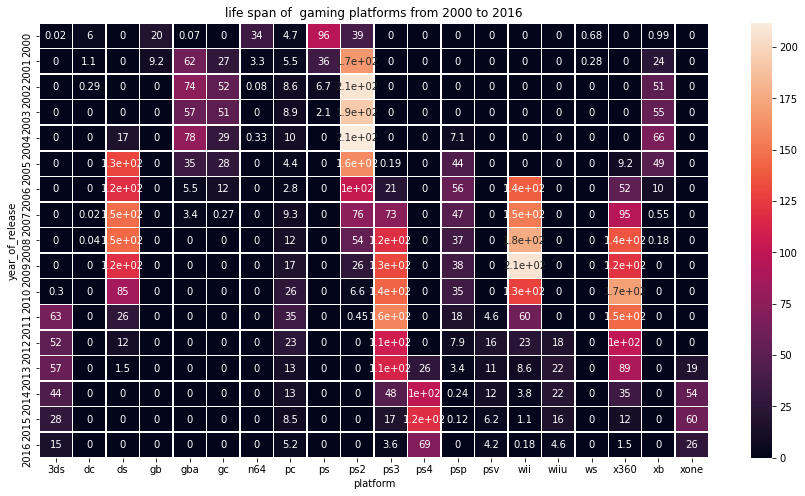

In [57]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data_pivot, annot=True, linewidths=.5, ax=ax)
plt.title('life span of  gaming platforms from 2000 to 2016')
plt.show()

In [58]:
data_new_2012=data[data.year_of_release>=2012]
display(data_new_2012)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,ps3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,m,21.05
23,grand theft auto v,x360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,m,16.27
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,200.0,200.0,unknown,14.63
33,pokemon x/pokemon y,3ds,2013,role-playing,5.28,4.19,4.35,0.78,200.0,200.0,unknown,14.60
34,call of duty: black ops ii,ps3,2012,shooter,4.99,5.73,0.65,2.42,83.0,5.3,m,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,200.0,200.0,unknown,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,200.0,200.0,unknown,0.01
16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,200.0,200.0,unknown,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,200.0,200.0,unknown,0.01


In [59]:
data_pivot_2012=pd.pivot_table(data_new_2012,index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',fill_value=0)
display(data_pivot_2012)

platform,3ds,ds,pc,ps3,ps4,psp,psv,wii,wiiu,x360,xone
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,0.00,7.95,16.19,22.94,17.56,100.72,0.00
2013,56.57,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


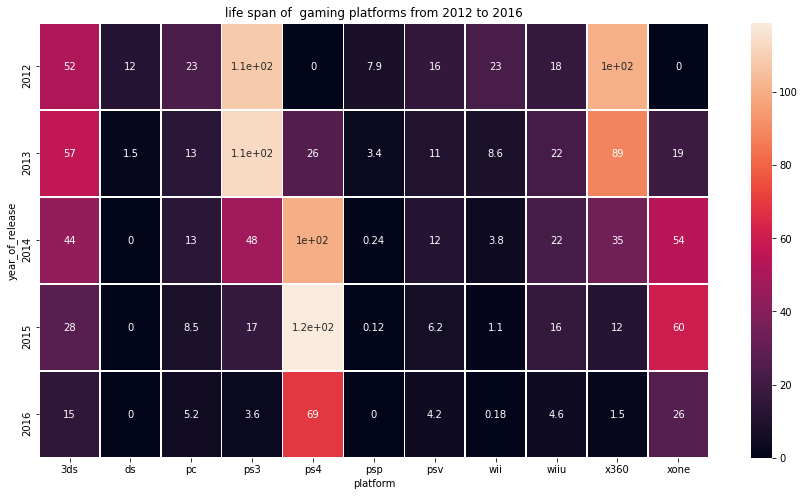

In [60]:
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(data_pivot_2012, annot=True, linewidths=.5, ax=ax)
plt.title('life span of  gaming platforms from 2012 to 2016')
plt.show()

**From the 2 heatmaps, we can see that most platforms are shrinking, we can't find any growing platforms, but we can see that, fot year 2017, ps4 and xbox one still have good possibility for good sales. 3ds can still generate some profits and probably, also pc, since it's possible to see that it's decrease is steady but slow.**

let's build a box plot for the global sales of all games, broken down by platformto see if the differences in sales and average sales are significant .

In [61]:
grouped=data_new.groupby(['platform','name'])['total_sales'].sum().reset_index()
display(grouped)

,platform,name,total_sales
0,3ds,beyblade burst,0.03
1,3ds,fire emblem fates,1.67
2,3ds,frozen: olaf's quest,0.59
3,3ds,haikyu!! cross team match!,0.04
4,3ds,12-sai. honto no kimochi,0.07
...,...,...,...
14582,xone,xcom 2,0.04
14583,xone,zombie army trilogy,0.11
14584,xone,zombiu,0.01
14585,xone,zoo tycoon (2013),0.36


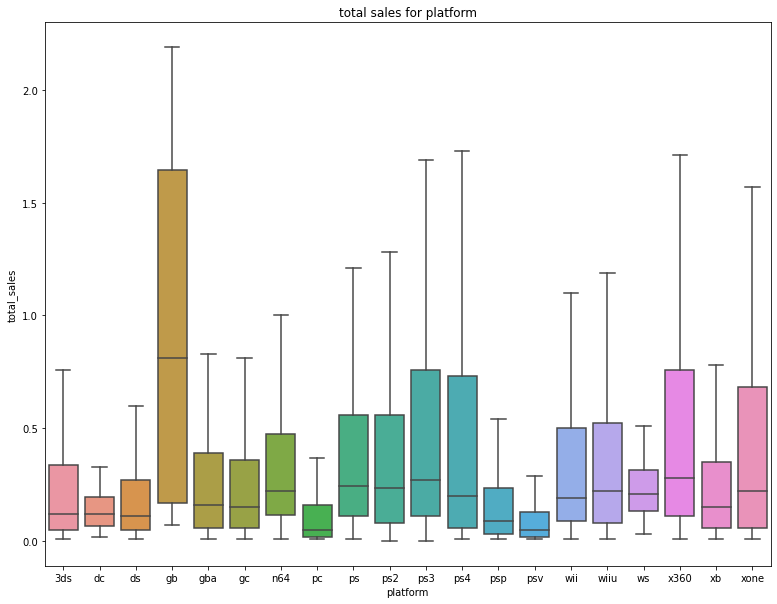

In [62]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform',y='total_sales',data=grouped, showfliers = False)
plt.title('total sales for platform')
plt.show()

Statistical description of the sales by platform:

In [63]:
def platform_sales_stat(a):
    
    '''defining a function to apply some stats to the total sales 
    by platform: mean,median, variance, standard deviation and the coefficient of variation'''
    
    a=grouped
    sales='total_sales'
    

    mean=a[sales].mean()
    std=a[sales].std()
    var=a[sales].var()
    median=a[sales].median()
    cv=std/mean
    plt.show()
    print("Variance is",var)
    print("Average is",mean)
    print("Median is",median)
    print(a.groupby(['platform'])[sales].mean())
    if cv>1:
        print("cv=",cv,"Great level of dispersion around the mean")
    else:
        print("cv=",cv,"Distribution centered around average")

In [64]:
platform_sales_stat(grouped)

Variance is 2.1293895156510496
Average is 0.4943915815452115
Median is 0.15000000000000002
platform
3ds     0.502000
dc      0.239032
ds      0.377942
gb      1.074074
gba     0.385892
gc      0.359891
n64     0.530000
pc      0.224779
ps      0.513504
ps2     0.582785
ps3     0.709552
ps4     0.801378
psp     0.244032
psv     0.125431
wii     0.694320
wiiu    0.559116
ws      0.240000
x360    0.773907
xb      0.314186
xone    0.645020
Name: total_sales, dtype: float64
cv= 2.951593115505343 Great level of dispersion around the mean


***There are significant differences in the sales by platform***

Take a look at how user and professional reviews affect sales for one popular platform: Play Station 4. Build a scatter plot and calculate the correlation between reviews and sales.

In [65]:
data_ps4=data.query('platform=="ps4" and user_score<200.0 and critic_score<200.0')

In [66]:
data_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
92,call of duty: advanced warfare,ps4,2014,shooter,2.81,3.48,0.14,1.23,83.0,5.7,m,7.66
94,fifa 17,ps4,2016,sports,0.66,5.75,0.08,1.11,85.0,5.0,e,7.60
105,fallout 4,ps4,2015,role-playing,2.53,3.27,0.24,1.13,87.0,6.5,m,7.17


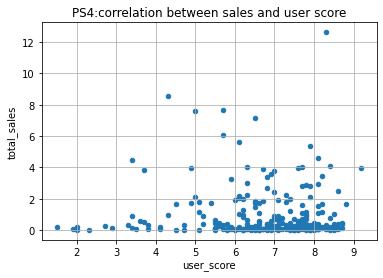

In [67]:
data_ps4.plot(x='user_score', y='total_sales', kind='scatter', grid=True)
plt.title('PS4:correlation between sales and user score')
plt.show()

In [68]:
correlation=data_ps4['user_score'].corr(data_ps4['total_sales'])
 
if np.abs(correlation)> 0.7:
    print("correlation=",correlation,"medium strong correlation between users score and sales")
else:
    print("correlation=",correlation," no relevant correlation between user score and sales ")  

correlation= -0.03362497596528878  no relevant correlation between user score and sales 


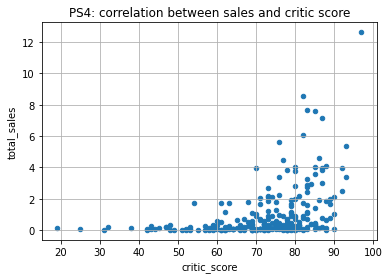

In [69]:
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter', grid=True)
plt.title('PS4: correlation between sales and critic score')
plt.show()


In [70]:
correlation2=data_ps4['user_score'].corr(data_ps4['total_sales'])
   
        
if np.abs(correlation2)>0.7:
    print("correlation=",correlation2,"medium strong correlation between critic score and sales")
else:
    print("correlation=",correlation2," no relevant correlation between critic score and sales ") 

correlation= -0.03362497596528878  no relevant correlation between critic score and sales 


#### compare the sales of the same games on other platforms, and the influence of the reviews:

In [71]:
games_ps4=data_ps4[['name','total_sales','user_score','critic_score']]

In [72]:
data_xone=data.query('platform=="xone"and user_score<200.0 and critic_score<200.0')

In [73]:
games_xone=data_xone[['name','total_sales','user_score','critic_score']]

In [74]:
display(games_xone)

,name,total_sales,user_score,critic_score
165,grand theft auto v,5.47,7.9,97.0
179,call of duty: advanced warfare,5.26,5.4,81.0
242,halo 5: guardians,4.49,6.4,84.0
270,fallout 4,4.22,6.2,88.0
373,assassin's creed: unity,3.50,4.1,72.0
...,...,...,...,...
16322,agatha christie's the abc murders,0.01,7.5,66.0
16392,goat simulator,0.01,6.3,53.0
16597,saints row: gat out of hell,0.01,6.0,65.0
16630,sébastien loeb rally evo,0.01,8.2,63.0


In [75]:
games_xone.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 165 to 16660
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          165 non-null    object 
 1   total_sales   165 non-null    float64
 2   user_score    165 non-null    float64
 3   critic_score  165 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [76]:
games_merged=games_ps4.merge(games_xone, how='left', on='name')

In [77]:
games_merged.head(10)

,name,total_sales_x,user_score_x,critic_score_x,total_sales_y,user_score_y,critic_score_y
0,grand theft auto v,12.62,8.3,97.0,5.47,7.9,97.0
1,fifa 16,8.58,4.3,82.0,3.25,4.4,84.0
2,call of duty: advanced warfare,7.66,5.7,83.0,5.26,5.4,81.0
3,fifa 17,7.60,5.0,85.0,2.65,5.5,84.0
4,fallout 4,7.17,6.5,87.0,4.22,6.2,88.0
5,fifa 15,6.08,5.7,82.0,2.18,5.4,82.0
6,destiny,5.64,6.1,76.0,3.37,5.5,75.0
7,uncharted 4: a thief's end,5.39,7.9,93.0,NaN,NaN,NaN
8,uncharted: the nathan drake collection,4.62,8.1,86.0,NaN,NaN,NaN
9,call of duty: infinite warfare,4.47,3.4,77.0,2.42,3.1,78.0


In [78]:
games_merged.dropna()

,name,total_sales_x,user_score_x,critic_score_x,total_sales_y,user_score_y,critic_score_y
0,grand theft auto v,12.62,8.3,97.0,5.47,7.9,97.0
1,fifa 16,8.58,4.3,82.0,3.25,4.4,84.0
2,call of duty: advanced warfare,7.66,5.7,83.0,5.26,5.4,81.0
3,fifa 17,7.60,5.0,85.0,2.65,5.5,84.0
4,fallout 4,7.17,6.5,87.0,4.22,6.2,88.0
...,...,...,...,...,...,...,...
227,worms: wmd,0.03,7.6,78.0,0.01,8.1,75.0
232,agatha christie's the abc murders,0.02,6.2,67.0,0.01,7.5,66.0
239,darksiders: warmastered edition,0.02,8.5,79.0,0.01,7.9,80.0
240,prototype: biohazard bundle,0.01,2.0,48.0,0.01,3.1,56.0


In [79]:
games_merged.columns=['game','total_sales_ps4','user_score_ps4','critic_score_ps4',
                     'total_sales_xone','user_score_xone','critic_score_xone']

In [80]:
games_merged.head()

,game,total_sales_ps4,user_score_ps4,critic_score_ps4,total_sales_xone,user_score_xone,critic_score_xone
0,grand theft auto v,12.62,8.3,97.0,5.47,7.9,97.0
1,fifa 16,8.58,4.3,82.0,3.25,4.4,84.0
2,call of duty: advanced warfare,7.66,5.7,83.0,5.26,5.4,81.0
3,fifa 17,7.60,5.0,85.0,2.65,5.5,84.0
4,fallout 4,7.17,6.5,87.0,4.22,6.2,88.0


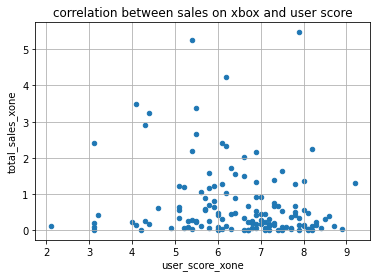

correlation= -0.14978717514556636  no relevant correlation between this score and sale 


In [81]:

   
games_merged.plot(x='user_score_xone', y='total_sales_xone', kind='scatter', grid=True)
plt.title('correlation between sales on xbox and user score')
plt.show()
    
correlation3=games_merged['user_score_xone'].corr(games_merged['total_sales_xone'])
   
        
if np.abs(correlation3)>0.7:
    print("correlation=",correlation3," medium strong correlation between this score and sales")
else:
    print("correlation=",correlation3," no relevant correlation between this score and sale ")    


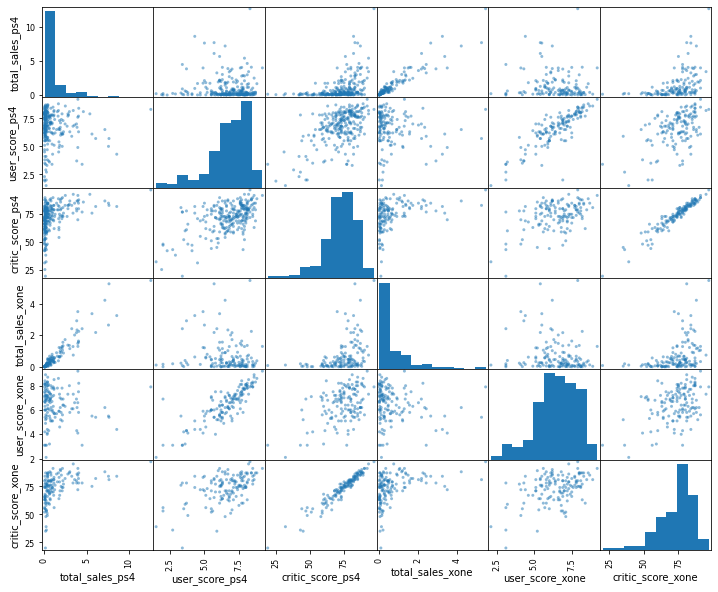

In [82]:
pd.plotting.scatter_matrix(games_merged, figsize=(12,10))
plt.show()

In [83]:
print(games_merged.corr())

                   total_sales_ps4  user_score_ps4  critic_score_ps4  \
total_sales_ps4           1.000000       -0.033625          0.405895   
user_score_ps4           -0.033625        1.000000          0.557654   
critic_score_ps4          0.405895        0.557654          1.000000   
total_sales_xone          0.939978       -0.091371          0.380995   
user_score_xone          -0.095149        0.841440          0.472673   
critic_score_xone         0.441045        0.529188          0.960869   

                   total_sales_xone  user_score_xone  critic_score_xone  
total_sales_ps4            0.939978        -0.095149           0.441045  
user_score_ps4            -0.091371         0.841440           0.529188  
critic_score_ps4           0.380995         0.472673           0.960869  
total_sales_xone           1.000000        -0.149787           0.394430  
user_score_xone           -0.149787         1.000000           0.439591  
critic_score_xone          0.394430         0.43959

*It looks like the reviews do not have a big impact on the total of sales worldwide. Digging bit further we can see that the critic scores, so the professional opinion, have a higher influence on the public in term of sales.*

### distribution of games by genres:

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  float64
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


In [85]:
genres=data.groupby('genre')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

In [86]:
print(genres)

           genre  total_sales
0         action      1735.63
10        sports      1326.71
8        shooter      1050.02
7   role-playing       931.77
4       platform       826.03
3           misc       794.41
6         racing       725.82
2       fighting       443.59
9     simulation       388.46
5         puzzle       240.54
1      adventure       233.35
11      strategy       173.25


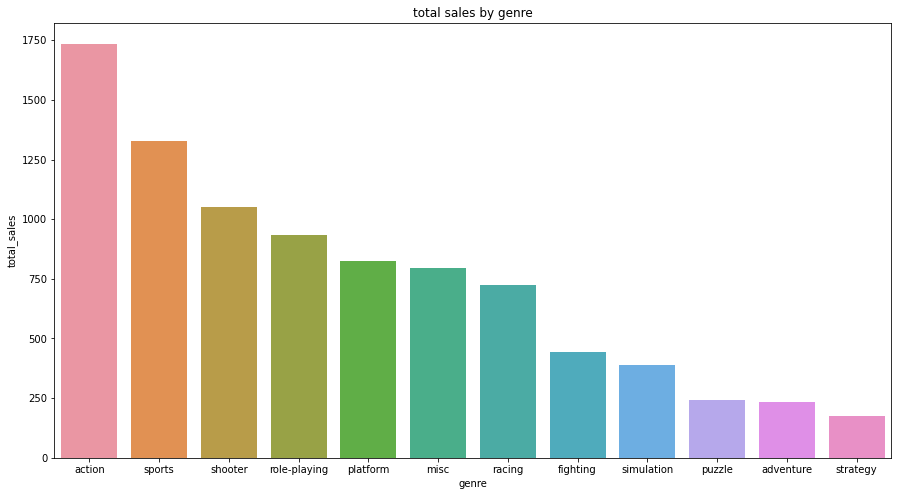

In [87]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=genres, x='genre', y='total_sales',)
plt.title('total sales by genre')
plt.show()

In [88]:
genres_ps4=data_ps4.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [89]:
genres_xone=data_xone.groupby('genre')['total_sales'].sum().sort_values( ascending=False)

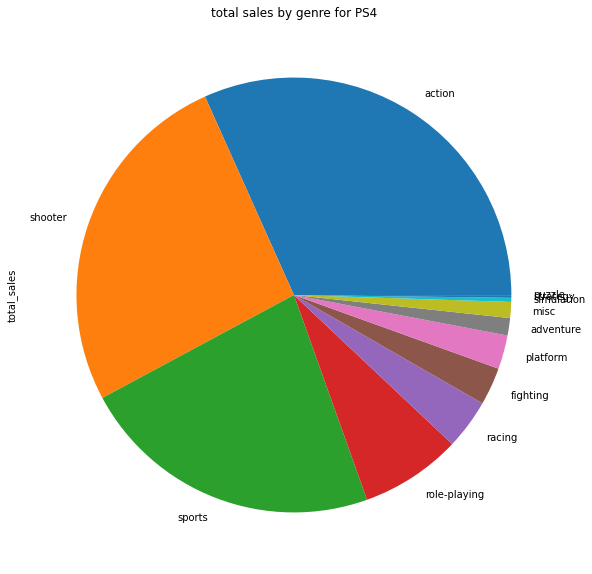

In [90]:
genres_ps4.plot.pie(x='genres', y='total_sales', figsize=(12,10))
plt.title('total sales by genre for PS4')
plt.show()

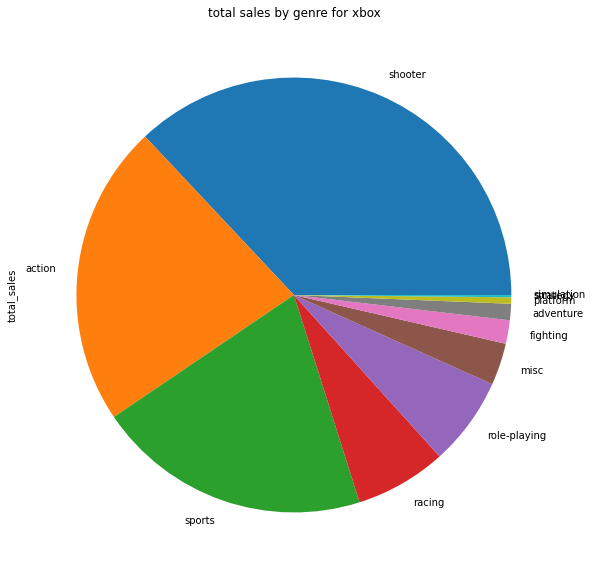

In [91]:
genres_xone.plot.pie(x='genres', y='total_sales', figsize=(12,10))
plt.title('total sales by genre for xbox')

plt.show()

videgames about action, sports and shooting are the one which generates the most sales, while puzzle, adventure and strategy are much less popular

***To sum up, a prognosis for maximizing 2017 sales would be to focus on sales of games for ps4 and xbox about action, sports and shooting, possibly with the best critic reviews.***

### Region profiles:

In [92]:
na=data_new_2012.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na.nlargest(5,['na_sales'])

,platform,na_sales
9,x360,140.57
4,ps4,108.74
3,ps3,103.74
10,xone,93.12
0,3ds,55.49


In [93]:
eu=data_new_2012.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu.nlargest(5,['eu_sales'])

,platform,eu_sales
4,ps4,141.09
3,ps3,107.27
9,x360,74.89
10,xone,51.59
0,3ds,42.83


In [94]:
jp=data_new_2012.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp.nlargest(5,['jp_sales'])

,platform,jp_sales
0,3ds,87.79
3,ps3,35.29
6,psv,21.04
4,ps4,15.96
8,wiiu,13.01


top 5 platforms for number of sales are the same for Europe and North America:ps4, ps3, x360, xone, 3ds. the public in japan prefers 3ds, with ps4 shifting to the 4th position.

The top five genres:

In [95]:
na_genres=data_new_2012.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_genres.nlargest(5,['na_sales'])

,genre,na_sales
0,action,180.15
8,shooter,144.79
10,sports,81.53
7,role-playing,64.00
3,misc,38.19


In [96]:
eu_genres=data_new_2012.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_genres.nlargest(5,['eu_sales'])

,genre,eu_sales
0,action,161.70
8,shooter,113.47
10,sports,69.09
7,role-playing,48.53
6,racing,27.29


In [97]:
jp_genres=data_new_2012.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_genres.nlargest(5,['jp_sales'])

,genre,jp_sales
7,role-playing,65.44
0,action,52.80
3,misc,13.10
9,simulation,10.41
2,fighting,9.44


Also about genres, we can notice that Japan hass different choices in terms of genres: they prefer role playing in absolute, and shooting is not in the top 5, while the most sold genres in Europe and north America are action and shooting.


Does rating have a correlation with sales?

In [98]:
na_rating=data_new_2012.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_rating

,rating,na_sales
2,m,242.34
0,e,117.79
4,unknown,83.30
1,e10+,80.07
3,t,69.80


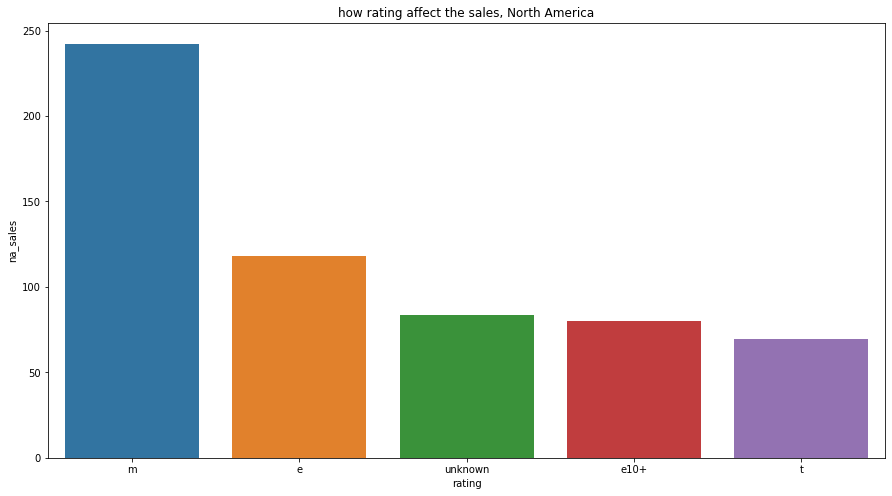

In [99]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=na_rating, x='rating', y='na_sales',)
plt.title('how rating affect the sales, North America')
plt.show()

In [100]:
eu_rating=data_new_2012.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_rating

,rating,eu_sales
2,m,206.43
0,e,115.40
4,unknown,70.51
1,e10+,59.80
3,t,57.04


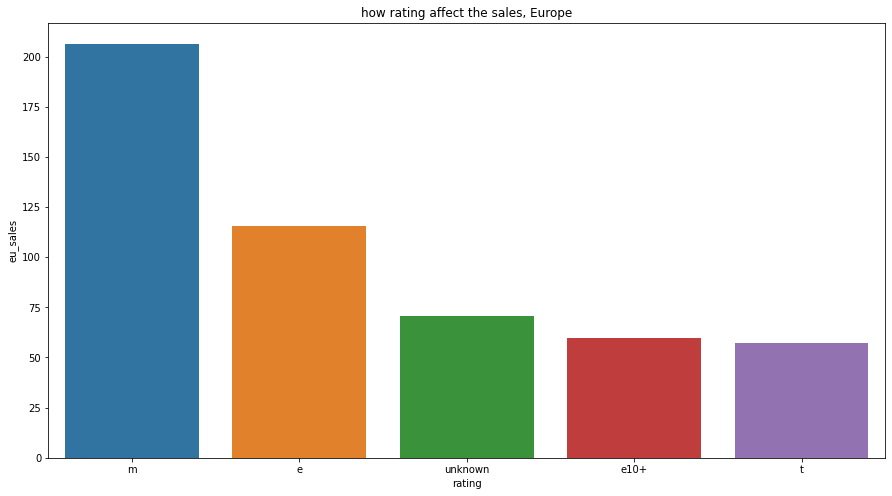

In [101]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=eu_rating, x='rating', y='eu_sales',)
plt.title('how rating affect the sales, Europe')
plt.show()

In [102]:
jp_rating=data_new_2012.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_rating

,rating,jp_sales
4,unknown,103.26
0,e,29.27
3,t,29.13
2,m,22.59
1,e10+,8.57


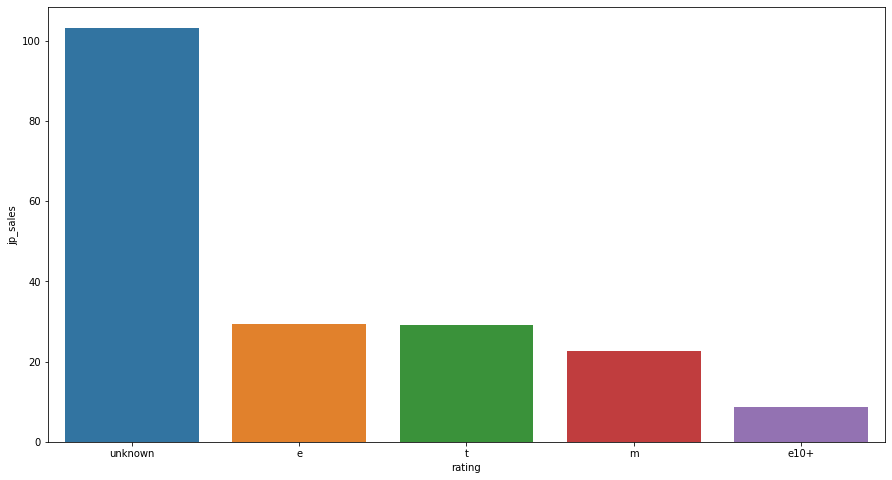

In [103]:
plt.figure(figsize=(15,8))
ax=sns.barplot(data=jp_rating, x='rating', y='jp_sales',)
plt.show()

Rating is linked to sales.ESRB ratings affect sales in individual regions

#### Step 5. Test the following hypotheses:
###### —Average user ratings of the Xbox One and PC platforms are the same.
###### —Average user ratings for the Action and Sports genres are different.


H0: *"the average user ratings of the Xbox One equals the average the user ratings of the PC " and that "the average user ratings for the Action genres equals the average user ratings for the Sports genres"*

H1: *"Average user ratings of the Xbox One and PC platforms differs." and "Average user ratings for the Action and Sports genres are different."

In order to test these two hypoteses, it's needed to formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value

The null hypothesis in statistics states that there is no difference between groups or no relationship between variables

The null hypotesis, H0 formulated in this analisys, is that ***
* ***"the average user ratings of the Xbox One equals the average the user ratings of the PC " and that "the average user ratings for the Action genres equals the average user ratings for the Sports genres"***

If the sample provides enough evidence against the claim that there’s no effect in the population (p ≤ α), then we can reject the null hypothesis. Otherwise, we fail to reject the null hypothesis.

Although “fail to reject” may sound awkward, it’s the only wording that statisticians accept.


The alternative hypotheses are:

* Average user ratings of the Xbox One and PC platforms are the same differs.
* Average user ratings for the Action and Sports genres are different.

to test the hipotheses, I am going to use a t-test: The indepentent T-test is a parametric test used to test for a statistically significant difference in the means between 2 groups. As with all parametric tests, there are certain conditions that need to be met in order for the test results to be considered reliable.

Parametric test assumptions:

Population distributions are normal Samples have equal variances The two samples are independent

H0 => µ1 = µ2 (population mean of dataset1 is equal to dataset2)

HA => µ1 ≠µ2 (population mean of dataset1 is different from dataset2)

to interpret the reults of the test, we need to choose a value for alpha, to compare the P value.

The alpha value cannot be determined in the sense that there were a formula to calculate it. Instead, it is arbitrarily chosen, ideally before the study is conducted.

The value alpha = 0.05 is a common choice that goes back to a suggestion by Ronald Fisher in his influential book Statistical Methods for Research Workers (first published in 1925). The only particular reason for this value is that if the test statistic has a normal distribution under the null hypothesis, then for a two-tailed test with alpha = 0.05 the critical values of the test statistic will be its mean plus/minus 2 (more exactly, 1.96) times its standard deviation.

In fact, you don't need alpha when you calculate the p value, because you can just publish the p value and then every reader can decide whether to consider it low enough for any given purpose or not.If the p-value is less than alpha, we reject the hypothesis

I choose a value of alpha=0.05

In [104]:
xbox=data.query('platform=="xone" and user_score<200.0')


In [105]:
pc=data.query('platform=="pc"and user_score<200.0')

In [106]:
sample1=xbox['user_score']
sample2=pc['user_score']

In [107]:
sample1.head(10)

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
398    5.5
413    7.5
417    4.4
422    7.2
484    6.4
Name: user_score, dtype: float64

In [108]:
sample2.head(10)

85     7.6
138    7.3
192    4.0
218    8.2
284    9.1
288    7.9
313    8.1
330    8.0
455    7.8
458    3.9
Name: user_score, dtype: float64

In [109]:
print(len(sample1))
print(len(sample2))

182
766


we can also find out if there is equality in two population by study of the varuiance and levene's test: In statistics, Levene's test is an inferential statistic used to assess the equality of variances for a variable calculated for two or more groups. Some common statistical procedures assume that variances of the populations from which different samples are drawn are equal. Levene's test assesses this assumption. It tests the null hypothesis that the population variances are equal (called homogeneity of variance or homoscedasticity). If the resulting p-value of Levene's test is less than some significance level (typically 0.05), the obtained differences in sample variances are unlikely to have occurred based on random sampling from a population with equal variances. Thus, the null hypothesis of equal variances is rejected and it is concluded that there is a difference between the variances in the population.

In [110]:
[np.var(x, ddof=1) for x in [sample1,sample2]]

[1.9069968429360695, 2.334881141316405]

In [111]:
st.levene(sample1, sample2, center='median')

LeveneResult(statistic=1.1496032519591928, pvalue=0.2839056622829332)

In [112]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample1,sample2)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  1.1488002807200714e-05
We reject the null hypothesis


In [113]:
action=data.query('genre=="action" and user_score<200.0')

In [114]:
sports=data.query('genre=="sports" and user_score<200.0')

In [115]:
sample3=action['user_score']
sample4=sports['user_score']

In [116]:
[np.var(x, ddof=1) for x in [sample3,sample4]]

[2.024746286149255, 2.60124008514694]

In [117]:
st.levene(sample3, sample4, center='median')

LeveneResult(statistic=14.719722891664793, pvalue=0.00012737877390417462)

In [118]:
alpha = 0.05  # critical statistical significance level
# if the p-value is less than alpha, we reject the hypothesis

results = st.ttest_ind(sample3,sample4)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis") 

p-value:  0.08026182535600913
We can't reject the null hypothesis


***we reject  the hipothesis that Average user ratings of the Xbox One and PC platforms are the same***

***We can't reject the hipothesis for which Average user ratings for the Action and Sports genres are different***

### conclusions:

This reaserch was based on data until year 2016. Data abour user and critic review, along with few other data presented a  large portion of missing values that I decided to impute where possible, and filter where not possible. As a result, I worked with data decresead in size, however clean and improved in quality.

I proceeded to analyze the sales of the games, mostly grouping data the platform and region, to determine the preferences of target audience. In order to do so, I also researched about the lifespan of platform, based on sales of games( per platform ) per year. this gave me a view of what is possible to expect for the year 2017:I could see that see that the sales of most modern platforms are shrinking, we can't find any growing platforms, but we can see that, fot year 2017, ps4 and xbox one still have good possibility for good sales. 3ds can still generate some profits and probably, also pc, since it's possible to see that it's decrease is steady but slow. also, it's important to notice that Japanese  cconsumer tend to prefer different platforms compared to European and American consumers. I believe it can be worth to conduct a further study about what Japanese consumers like in those platforms.

Then, I wanted to  find out which parameters have the biggest impact on sales among genre, user score, critic score and esrb rating. I found out that user and critic review don't have a strong correlation to the total of the sales worldwide, nevertheless the professiuonal reviews have a higher impact on sales. The Genre is a big factor: the games about action, shooting and role playing register the highest sales, but we definetely see a difference betweern Europe/North America and Japan: the first group loves action, violence(shooting) and sport(probably football) while Japanese prefer role playing games. 

In general, games rated "Mature" and "Teen" by the ERSB sell the most.

I used barplot, pie charts and lollipop chart to visualize results about sales and scatteplots along pearson coefficient  to evaluate correlation. I used the ttest and pvalue statistical tools to prove hypotesis, and general concepts of statistic,( as median, variance and standard deviatio)n throughout the study

***To sum up, a prognosis for maximizing 2017 sales would be to focus on sales of games for ps4 and xbox about action, sports and shooting, putting an enphasis also on role games, to register good sales in Japan. choosing games with the best critic review is not crucial, but it would probably help. I would recommend to focus on games for a mature target of audience, since we determined that those are the games which sell the most***